<a href="https://colab.research.google.com/github/abdallahfawzy39/IoT_Energy_Analytics/blob/main/EN3A_IoT_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imorting Librararies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mounting Google Drive to colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data File

In [ ]:
# Define the path to the CelebA dataset in your Google Drive
CSV_path = '/content/drive/MyDrive/IoT_CSV/household_power_consumption.txt'

power = pd.read_csv(CSV_path, delimiter=';',low_memory=False)
power.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
print('Shape of Power Consumption Data:',power.shape)

Shape of Power Consumption Data: (2075259, 9)


In [ ]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


# Exploratory Data Analysis

 since there are some missing values and zeros we will do a quick analysis

Null Values

In [ ]:
null_values = power.isna().sum()

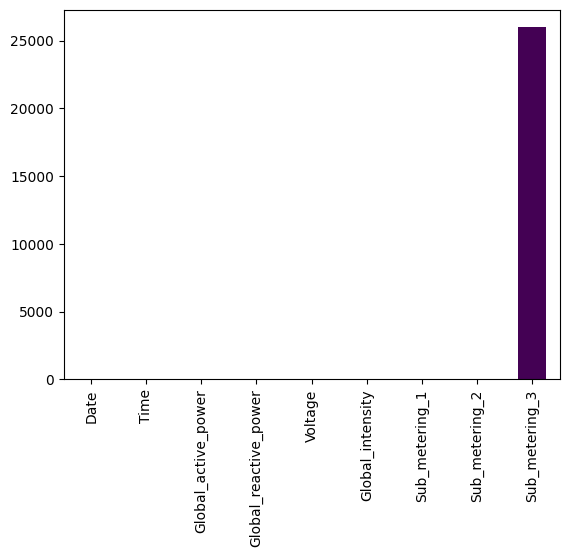

In [ ]:
null_values.plot(kind='bar',cmap='viridis')
plt.show()

Replacing ? with null

In [ ]:
power.replace('?',pd.NA,inplace=True)

In [ ]:
null_values = power.isna().sum()

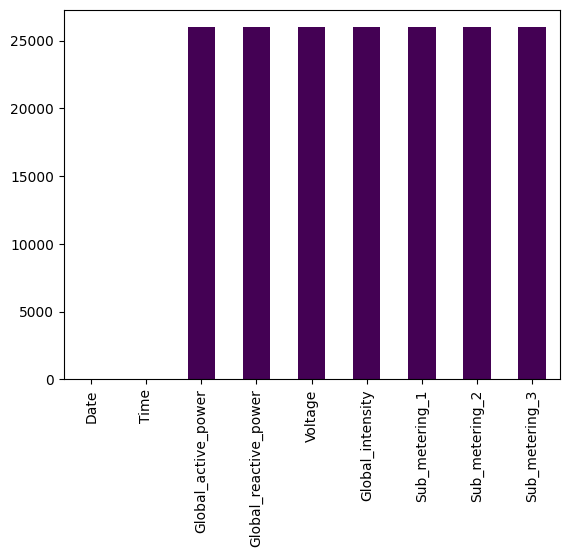

In [ ]:
null_values.plot(kind='bar',cmap='viridis')
plt.show()

In [ ]:
power.dropna(inplace=True)

In [ ]:
print('Shape of Power Consumption Data after removing null values:',power.shape)

Shape of Power Consumption Data after removing null values: (2049280, 9)


In [ ]:
power.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Changing dtypes of columns to float datatype

In [ ]:
power['Global_active_power'] = power['Global_active_power'].astype('float')
power['Global_reactive_power'] = power['Global_reactive_power'].astype('float')
power['Voltage'] = power['Voltage'].astype('float')
power['Global_intensity'] = power['Global_intensity'].astype('float')
power['Sub_metering_1'] = power['Sub_metering_1'].astype('float')
power['Sub_metering_2'] = power['Sub_metering_2'].astype('float')
power['Sub_metering_3'] = power['Sub_metering_3'].astype('float')

In [ ]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 156.3+ MB


In [ ]:
power.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


Boxplot of Columns

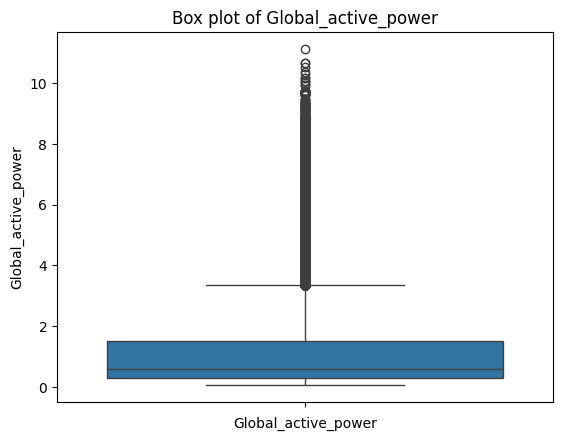

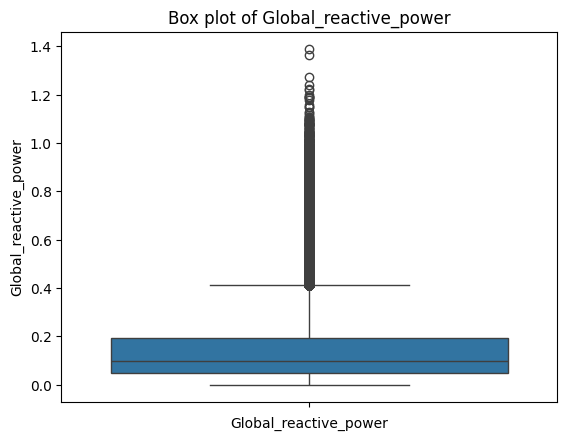

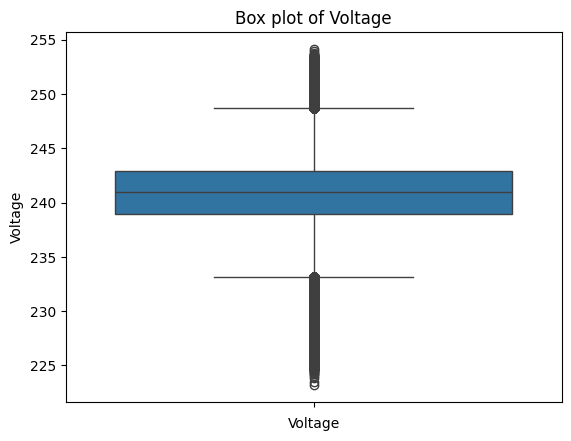

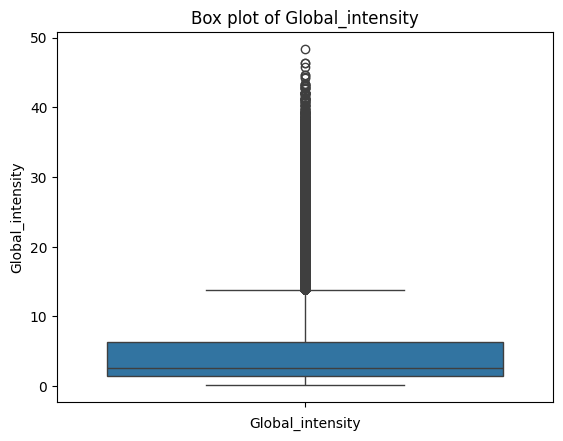

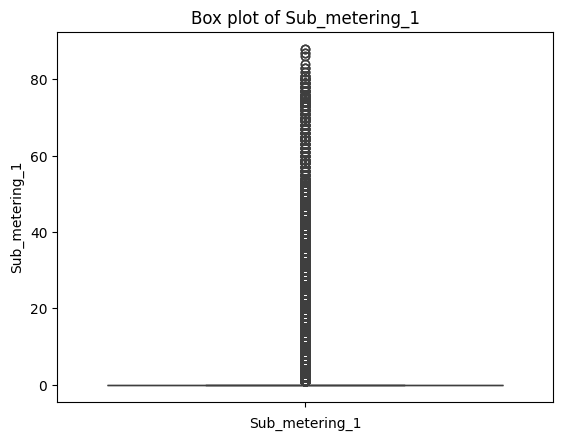

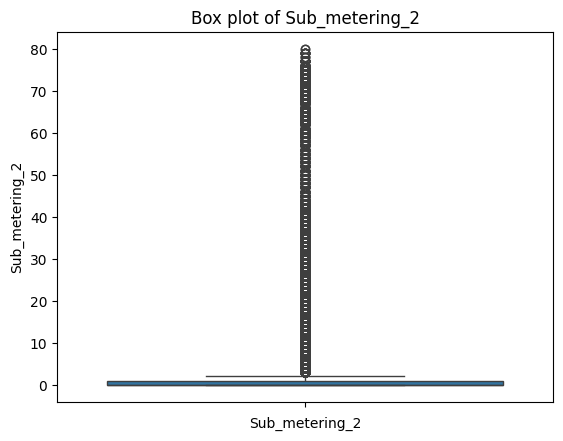

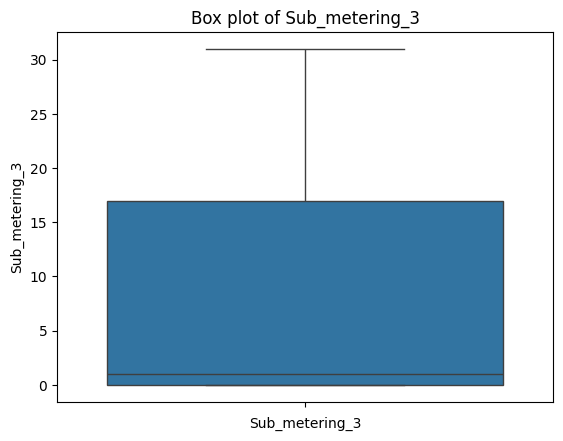

In [ ]:
cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

for column in cols:
    sns.boxplot(power[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(f'{column}')
    plt.show()

Preparing Summary DataFrame grouped by Date

In [ ]:
active_power = power.groupby('Date')['Global_active_power'].sum()
voltage_avg = power.groupby('Date')['Voltage'].mean()
intensity = power.groupby('Date')['Global_intensity'].sum()
submeter_1 = power.groupby('Date')['Sub_metering_1'].sum()
submeter_2 = power.groupby('Date')['Sub_metering_2'].sum()
submeter_3 = power.groupby('Date')['Sub_metering_3'].sum()

In [ ]:
total_energy = pd.merge(active_power,voltage_avg,on='Date',how='inner')

In [ ]:
total_energy_2 = total_energy.merge(intensity,on='Date',how='inner')
total_energy_3 = total_energy_2.merge(submeter_1,on='Date',how='inner')
total_energy_4 = total_energy_3.merge(submeter_2,on='Date',how='inner')
energy = total_energy_4.merge(submeter_3,on='Date',how='inner')

In [ ]:
energy.head()

,Global_active_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,
1/1/2007,2749.004,240.128979,11400.4,0.0,352.0,5880.0
1/1/2008,2759.738,241.036674,11489.2,2461.0,2739.0,12355.0
1/1/2009,1406.692,242.836062,5975.8,765.0,3845.0,2803.0
1/1/2010,1224.252,242.565722,5093.4,2304.0,327.0,3558.0
1/10/2007,1720.922,239.239917,7306.2,1507.0,6622.0,5960.0


# Preprocessing

In [ ]:
df_electric = energy.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

attributes = list(df_electric.columns)
num_pipeline = make_pipeline(StandardScaler())
preprocessing = ColumnTransformer([
    ('num',num_pipeline,attributes)
])

# PCA and KMeans

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = make_pipeline(preprocessing,PCA(n_components=.95))

To decide which number of clusters will be the best

In [ ]:
inertias = []
n_clusters = [2,3,4,5,6,7,8]

for cluster in n_clusters:
    kmeans_electric = make_pipeline(pca,KMeans(n_clusters=cluster,n_init='auto',random_state=42))
    kmeans_electric.fit(df_electric)
    inertias.append(kmeans_electric['kmeans'].inertia_)

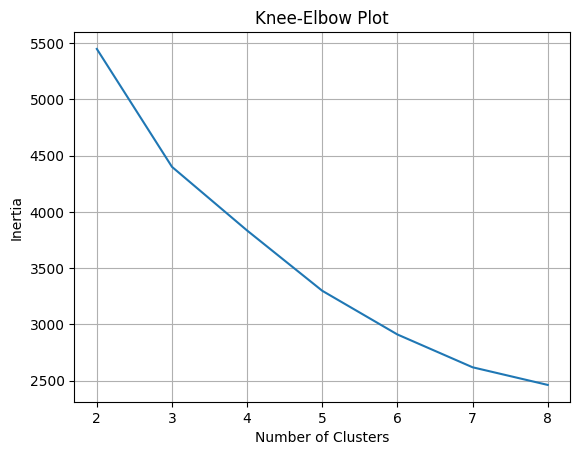

In [ ]:
plt.plot(n_clusters,inertias)
plt.title('Knee-Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

Number of clusters chosen according to Knee-Elbow Plot = 3

In [ ]:
kmeans_e3 = make_pipeline(pca,KMeans(n_clusters=3,n_init='auto',random_state=42))
kmeans_e3.fit(df_electric)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['Global_active_power',
                                                                    'Voltage',
                                                                    'Global_intensity',
                                                                    'Sub_metering_1',
                                                                    'Sub_metering_2',
                                                                    'Sub_metering_3'])])),
                                 ('pca', PCA(n_components=0.95))])),
                ('kmeans',
                 KMeans(n_clusters=3, n_init='auto', random_state=42))])

In [ ]:
energy['cluster'] = kmeans_e3['kmeans'].labels_

# Cluster Analysis

Global Active Power

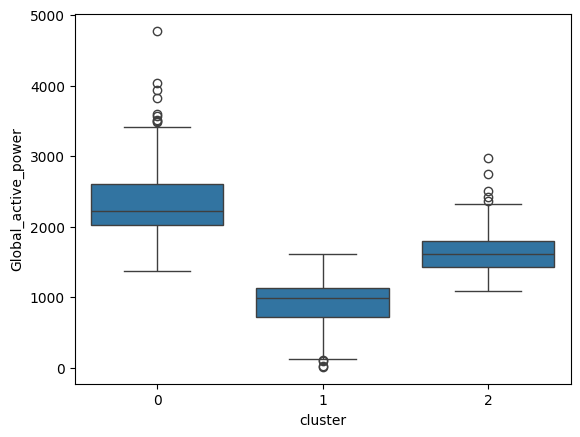

In [ ]:
sns.boxplot(data=energy,x='cluster',y='Global_active_power')
plt.show()

Voltage

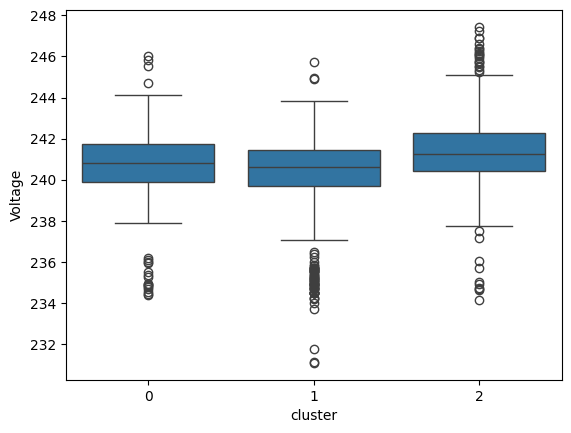

In [ ]:
sns.boxplot(data=energy,x='cluster',y='Voltage')
plt.show()

Global Intensity

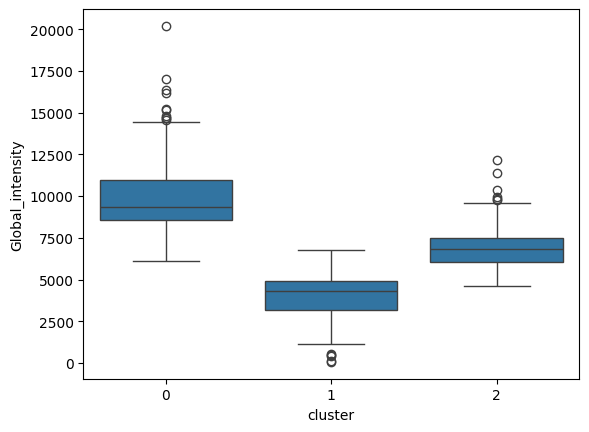

In [ ]:
sns.boxplot(data=energy,x='cluster',y='Global_intensity')
plt.show()

Sub_metering_1

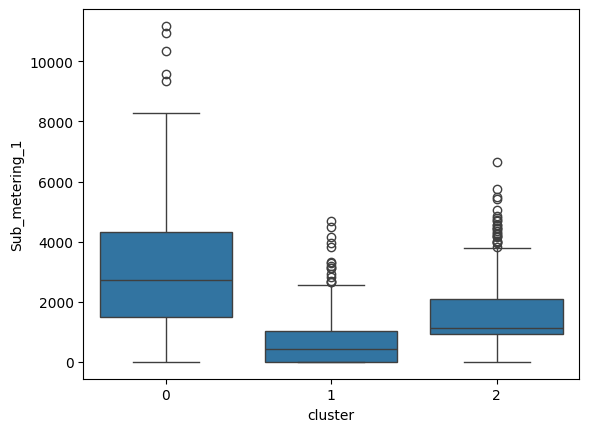

In [ ]:
sns.boxplot(data=energy,x='cluster',y='Sub_metering_1')
plt.show()

Sub_metering_2

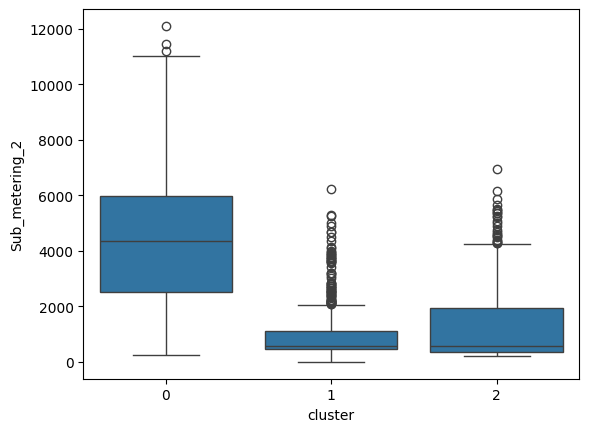

In [ ]:
sns.boxplot(data=energy,x='cluster',y='Sub_metering_2')
plt.show()

Sub_metering_3

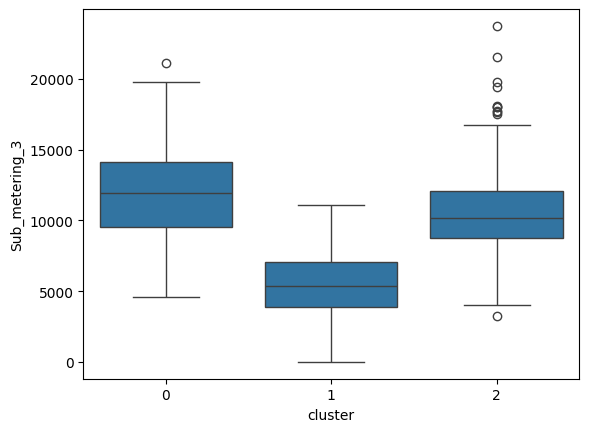

In [ ]:
sns.boxplot(data=energy,x='cluster',y='Sub_metering_3')
plt.show()

In [ ]:
cluster_0 = energy[energy.cluster == 0]
cluster_1 = energy[energy.cluster == 1]
cluster_2 = energy[energy.cluster == 2]

cluster 0

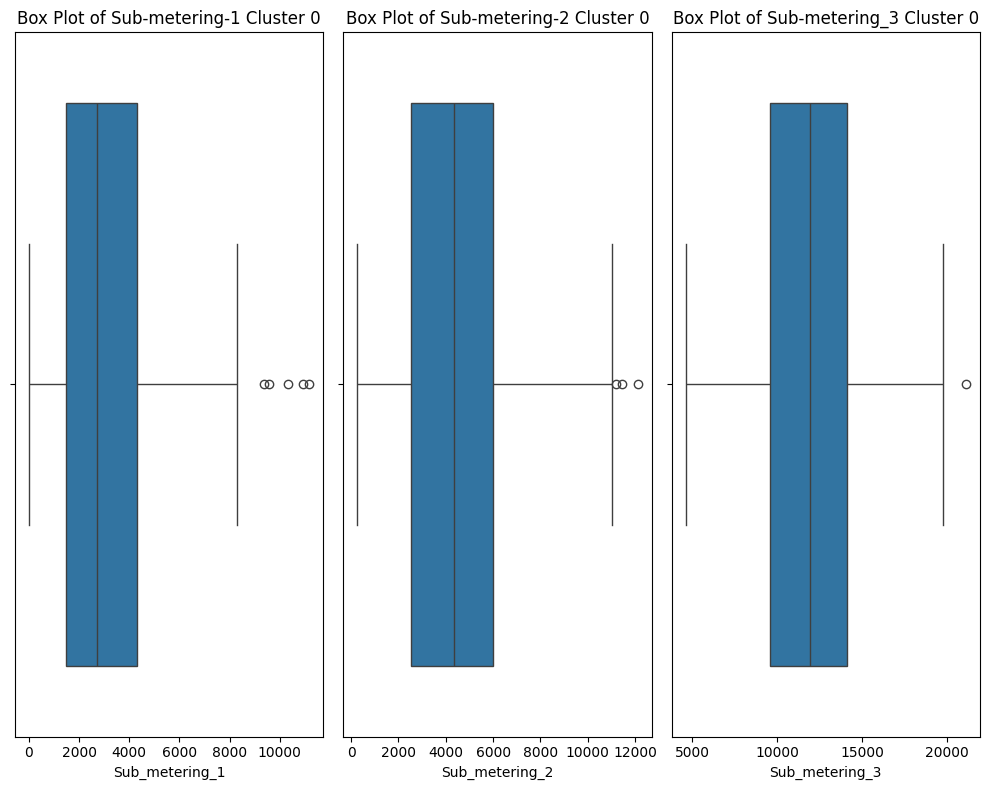

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(10,8))
sns.boxplot(data=cluster_0,x='Sub_metering_1',ax=axes[0])
axes[0].set_title('Box Plot of Sub-metering-1 Cluster 0')
sns.boxplot(data=cluster_0,x='Sub_metering_2',ax=axes[1])
axes[1].set_title('Box Plot of Sub-metering-2 Cluster 0')
sns.boxplot(data=cluster_0,x='Sub_metering_3',ax=axes[2])
axes[2].set_title('Box Plot of Sub-metering_3 Cluster 0')
plt.tight_layout()
plt.show()

cluster 2

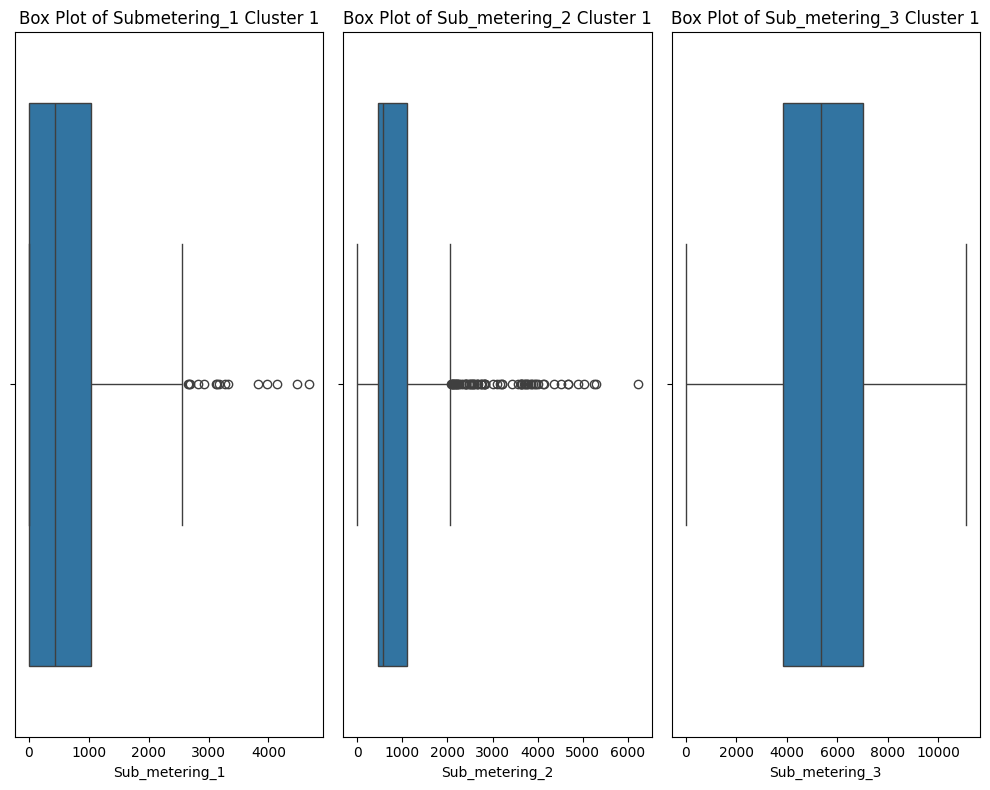

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(10,8))
sns.boxplot(data=cluster_1,x='Sub_metering_1',ax=axes[0])
axes[0].set_title('Box Plot of Submetering_1 Cluster 1')
sns.boxplot(data=cluster_1,x='Sub_metering_2',ax=axes[1])
axes[1].set_title('Box Plot of Sub_metering_2 Cluster 1')
sns.boxplot(data=cluster_1,x='Sub_metering_3',ax=axes[2])
axes[2].set_title('Box Plot of Sub_metering_3 Cluster 1')
plt.tight_layout()
plt.show()

cluster 3

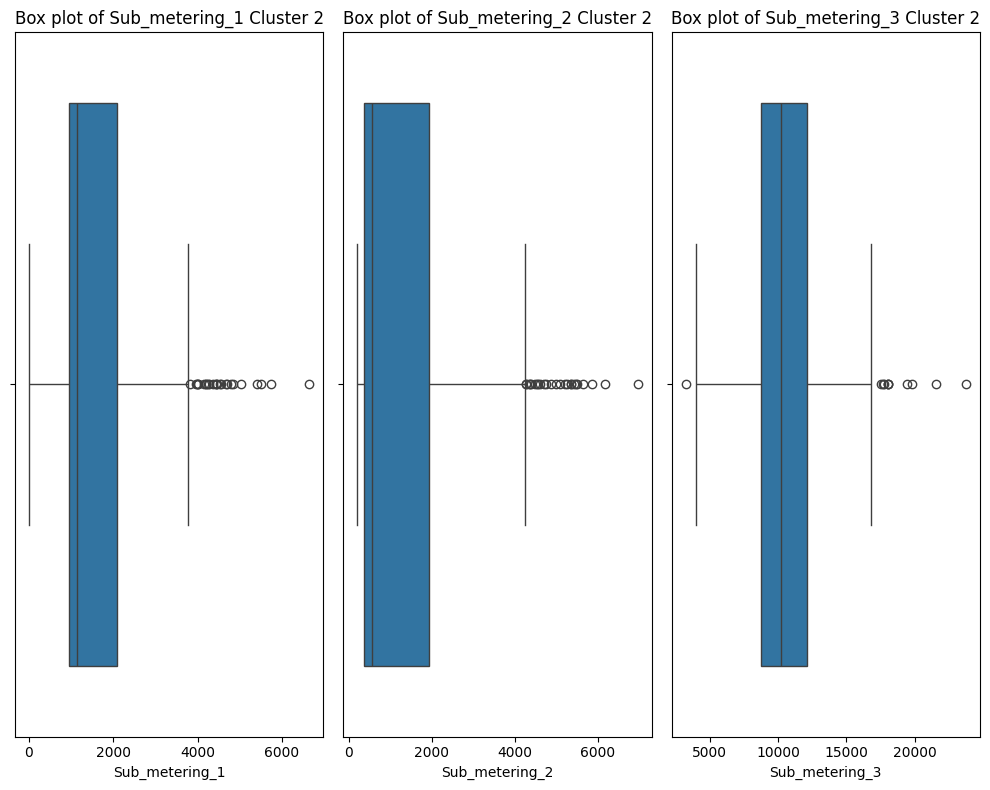

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(10,8))
sns.boxplot(data=cluster_2,x='Sub_metering_1',ax=axes[0])
axes[0].set_title('Box plot of Sub_metering_1 Cluster 2')
sns.boxplot(data=cluster_2,x='Sub_metering_2',ax=axes[1])
axes[1].set_title('Box plot of Sub_metering_2 Cluster 2')
sns.boxplot(data=cluster_2,x='Sub_metering_3',ax=axes[2])
axes[2].set_title('Box plot of Sub_metering_3 Cluster 2')
plt.tight_layout()
plt.show()

In [ ]:
energy_transformed = kmeans_e3.transform(df_electric)

In [ ]:
energy_transformed.shape

(1433, 3)

In [ ]:
df_transformed = pd.DataFrame(energy_transformed,columns=['transformed_1','transformed_2','transformed_3'])

In [ ]:
df_transformed.head()

,transformed_1,transformed_2,transformed_3
0,1.896758,3.221633,1.237446
1,1.022246,4.803915,2.687035
2,3.709953,2.225119,2.486092
3,4.104252,1.757268,2.191324
4,2.696069,3.330516,3.043796


In [ ]:
df_transformed['cluster'] = kmeans_e3['kmeans'].labels_

# Transformed Data Analysis

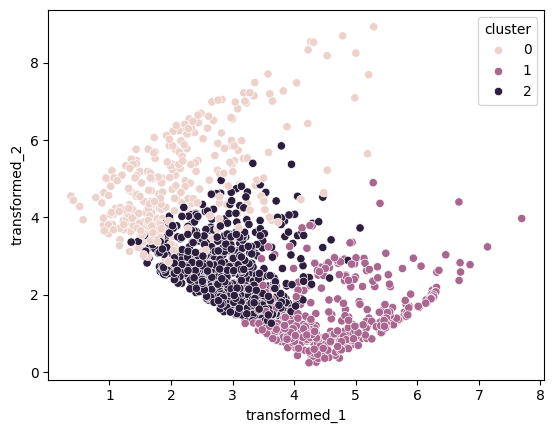

In [ ]:
sns.scatterplot(data=df_transformed,x='transformed_1',y='transformed_2',hue='cluster')
plt.show()

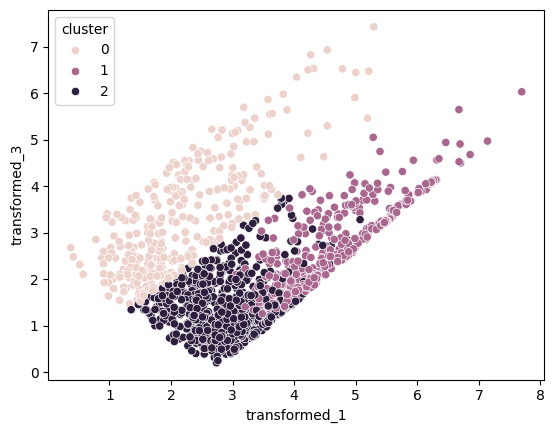

In [ ]:
sns.scatterplot(data=df_transformed,x='transformed_1',y='transformed_3',hue='cluster')
plt.show()

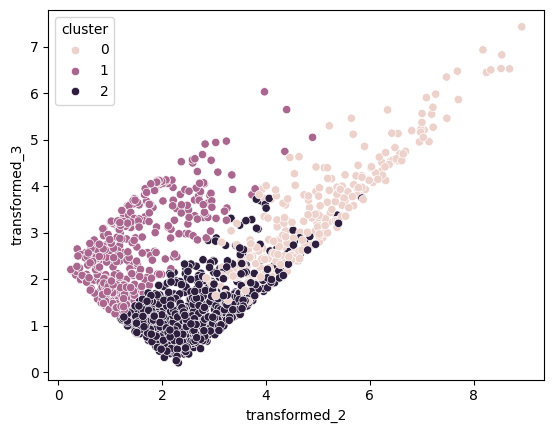

In [ ]:
sns.scatterplot(data=df_transformed,x='transformed_2',y='transformed_3',hue='cluster')
plt.show()